In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.5946395 , -0.58953   , -0.34833212,  0.52608611,  0.71798369,
         0.04789914,  0.24507951, -0.42929239, -0.12091003, -0.72853146],
       [-0.69943903, -0.5065018 , -1.30815696,  1.11358665,  0.8962515 ,
        -0.37823396, -0.48451446, -0.188085  , -0.96555071, -1.12146696]])

In [4]:
test_Features[:2]

array([[-0.41631011, -0.1476414 , -0.14392498, -0.4722272 , -0.44573408,
         0.33315277,  0.39324384,  0.34885062,  2.13854476, -1.87633694],
       [ 2.20983424,  1.16125196,  0.98962478, -0.52747632, -0.62581172,
        -2.09268287, -2.18563171, -1.67988709,  0.47123412,  1.84064366]])

In [5]:
train_Label[:4]

array([0, 1, 1, 0])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([0, 0, 1, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=20*4,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=20*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=20*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                880       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 9,021
Trainable params: 9,021
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 2s - loss: 0.6866 - acc: 0.6428 - val_loss: 0.6615 - val_acc: 0.6465
Epoch 2/30
 - 0s - loss: 0.5562 - acc: 0.7196 - val_loss: 0.4634 - val_acc: 0.8108
Epoch 3/30
 - 0s - loss: 0.4248 - acc: 0.8088 - val_loss: 0.3879 - val_acc: 0.8338
Epoch 4/30
 - 0s - loss: 0.3910 - acc: 0.8272 - val_loss: 0.3654 - val_acc: 0.8443
Epoch 5/30
 - 0s - loss: 0.3729 - acc: 0.8408 - val_loss: 0.3552 - val_acc: 0.8548
Epoch 6/30
 - 0s - loss: 0.3604 - acc: 0.8516 - val_loss: 0.3434 - val_acc: 0.8647
Epoch 7/30
 - 0s - loss: 0.3515 - acc: 0.8569 - val_loss: 0.3360 - val_acc: 0.8660
Epoch 8/30
 - 0s - loss: 0.3444 - acc: 0.8615 - val_loss: 0.3347 - val_acc: 0.8686
Epoch 9/30
 - 0s - loss: 0.3389 - acc: 0.8621 - val_loss: 0.3323 - val_acc: 0.8660
Epoch 10/30
 - 0s - loss: 0.3343 - acc: 0.8632 - val_loss: 0.3270 - val_acc: 0.8693
Epoch 11/30
 - 0s - loss: 0.3318 - acc: 0.8634 - val_loss: 0.3216 - val_acc: 0.8739
Epoch 12/30
 - 0s - loss: 0.3260 - a

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

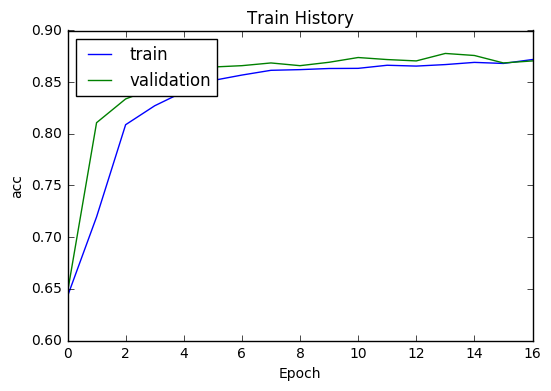

In [19]:
show_train_history(train_history,'acc','val_acc')

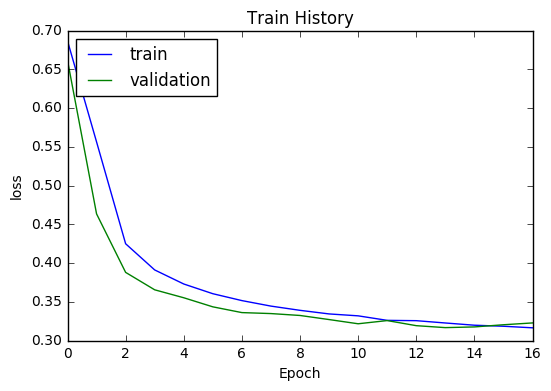

In [20]:
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 17us/step


In [22]:
scores[1]

0.8527865402956741